# The Pacific Decadal Oscillation and autocorrelation

In this notebook, the Pacific Decadal Oscillation (PDO) is used to demonstrate the autocorrelation of a function at various time lags. As we have already learned, the PDO is the first principle component of sea surface temperature in the North Pacific (see [Week 07 Lecture Notes](week07a-PCA-EOF.ipynb)). This particular version of the PDO is an NOAA extended reconstruction that provides monthly values all the way back to 1854.

Data source:
https://www.ncdc.noaa.gov/teleconnections/pdo/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'data/week09_PDO/pdo.dat'

df = pd.read_csv(filename,skiprows=1)
df.head()

,Date,Value
0,185401,-1.17
1,185402,-0.95
2,185403,-0.75
3,185404,-0.52
4,185405,-0.52


The dates are given as numbers in `yyyymm` format. This code creates a new data array that contains the date in the NumPy `datetime64` format.

In [2]:
df['datetime'] = pd.to_datetime(df['Date'].astype(str),format='%Y%m')
df.head()

,Date,Value,datetime
0,185401,-1.17,1854-01-01
1,185402,-0.95,1854-02-01
2,185403,-0.75,1854-03-01
3,185404,-0.52,1854-04-01
4,185405,-0.52,1854-05-01


In [3]:
pdo = df['Value']
t = np.arange(0,len(pdo))

## Plotting the PDO time series

Text(0.5,1,'PDO index - NOAA extended reconstruction')

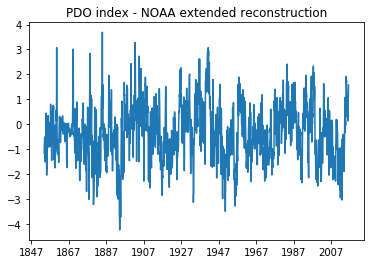

In [4]:
plt.figure()
plt.plot(df['datetime'],pdo)
plt.title('PDO index - NOAA extended reconstruction')

## Autocorrelation function

The *autocorrelation function* is the correlation of a time series with itself, as a function of time lag.

If there is no lag, the correlation of a time series with itself is equal to 1.

In [5]:
np.corrcoef(pdo,pdo)

array([[1., 1.],
       [1., 1.]])

However, if we offset the time series by one month ($\tau = 1$) and then compute the correlation coefficient $r(\tau=1)$, it is still fairly high but not equal to one.

In [6]:
r_1 = np.corrcoef(pdo[1:],pdo[:-1])[1,0]
print('r(tau=1) = '+ str(r_1)[:4])

r(tau=1) = 0.82


In this case, we are computing the correlation between the two time series shown below. Only the first 40 months of the time series are shown for clarity.

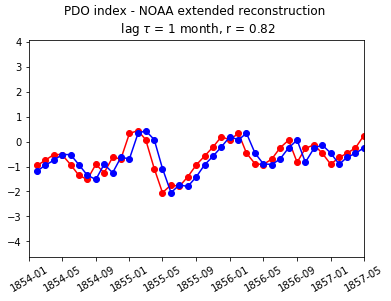

In [12]:
plt.figure()
plt.plot(df['datetime'][1:],pdo[1:],'r-o')
plt.plot(df['datetime'][1:],pdo[:-1],'b-o')
plt.xlim(df['datetime'][0],df['datetime'][40])
plt.xticks(rotation=30)
plt.title('PDO index - NOAA extended reconstruction \n lag $\\tau$ = 1 month, r = '+str(r_1)[:4]);

In [8]:
r_2 = np.corrcoef(pdo[2:],pdo[:-2])[1,0]
print('r(tau=2) = '+ str(r_2)[:4])

r(tau=2) = 0.67


Text(0.5,1,'PDO index - NOAA extended reconstruction \n lag $\\tau$ = 1 month, r = 0.67')

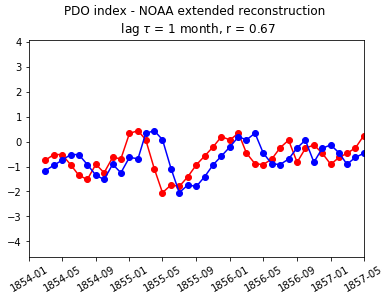

In [9]:
plt.figure()
plt.plot(df['datetime'][2:],pdo[2:],'r-o')
plt.plot(df['datetime'][2:],pdo[:-2],'b-o')
plt.xlim([df['datetime'][0],df['datetime'][40]])
plt.xticks(rotation=30)
plt.title('PDO index - NOAA extended reconstruction \n lag $\\tau$ = 1 month, r = '+str(r_2)[:4])

## Exercises

* Compute the correlation coefficient (r) for a lag of $\tau$ = 3 months
* Compute the correlation coefficient (r) for the first 800 lags
* Plot the autocorrelation function (r vs. lag)
* Compute the decorrelation time scale (lag where r goes to 0)

__First:__ Write out the *algorithm* in words.